Aufgabenteil 1 Bild einlesen

Starten Sie die IDE und legen Sie ein neues Projekt auf dem Z-Laufwerk an.
 2. Lesen Sie ein Bild mit Hilfe von scikit-image ein und lassen Sie sich das Bild anzeigen.
 3. Untersuchen Sie den Datentyp des eingelesenen Bildes. Wie ist ein Numpy Array aufge
baut?
 4. Lassen Sie sich die drei Farbkanale eines Bildes getrennt anzeigen.
 5. Implementieren Sie eine Funktion, die ein eingelesenes Bild wahlweise horizontal oder
 vertikal spiegelt. (Verwenden Sie hierfur keine Numpy Funktionen.)

https://scikit-image.org/docs/stable/user_guide/data_types.html

Shape of bild01: (333, 500, 3)
Data type of bild01: uint8


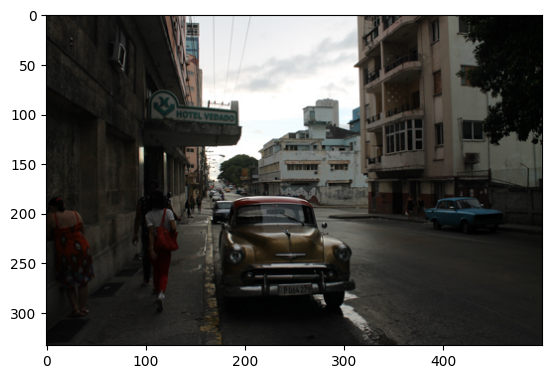

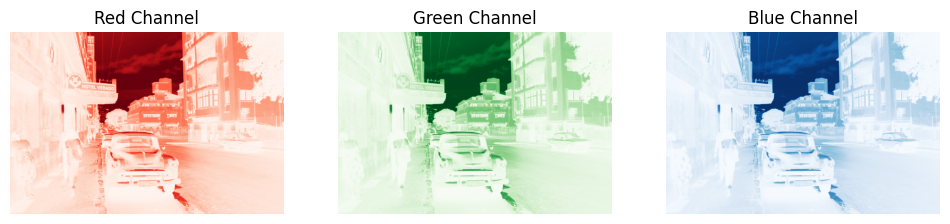

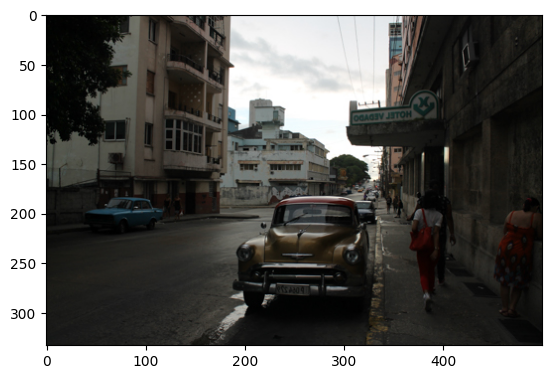

In [25]:
import skimage as ski
import os
from natsort import natsorted, ns
import numpy as np
import matplotlib.pyplot as plt

bild01 = ski.io.imread(os.path.join("bild01.jpg"))

print("Shape of bild01:", bild01.shape)
print("Data type of bild01:", bild01.dtype)

plt.imshow(bild01)

def show_Image(img):
    red = img[:, :, 0]   # alle Zeilen und SPalten mit dem Rot-Kanal ausgwählt
    green = img[:, :, 1]
    blue = img[:, :, 2]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)   # 1 Zeile, 3 Spalten, 1 Index der aktuellen Teilgrafik
    plt.imshow(red, cmap='Reds')
    plt.title("Red Channel")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(green, cmap='Greens')
    plt.title("Green Channel")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(blue, cmap='Blues')
    plt.title("Blue Channel")
    plt.axis('off')

    return plt.show()

def mirror_Image(img, orientation):

    mirrored = []

    if orientation == "horizontal":
        for row in img:
            new_row = []
            for i in range(len(row)-1, -1, -1):
                new_row.append(row[i])
            mirrored.append(new_row)

    elif orientation == "vertical":
        for i in range(len(img)-1, -1, -1):
            mirrored.append(img[i])

    else:
        raise ValueError("Ungültige Ausrichtung. Wählen Sie 'horizontal' oder 'vertical'.")
        
    return mirrored

show_Image(bild01)
mirror_Imagered = mirror_Image(bild01, "horizontal")
plt.imshow(mirror_Imagered)


Aufgabenteil 2

 Laden Sie das Buch Digitale Bildverarbeitung aus Moodle herunter. Lesen Sie die
 Kapitel 4- 5 (Histogramme und Punktoperationen).
 2. Lesen Sie die Bilder mit Hilfe von scikit-image ein.
 3. Schreiben Sie einen Funktion, die das Histogramm eines 8-Bit-Graustufenbildes (256
 Intensitatsstufen) berechnet.
 • Zunchst muss eine Funktion geschrieben werden, die ein RGB-Bild in ein Graustufen
bild (mit nur einem Kanal) umwandelt.
 • Prototyp: histo = computeHisto(image) # histo as numpy array of size 256
 • Das Histogramm kann mithilfe der Bibliothek matplotlib angezeigt werden. Das
 Anzeigen eines Histogramms (in Form eines 1-dimensionalen Numpy Arrays) ist in
 template.py bereits implementiert

Bilder einlesen

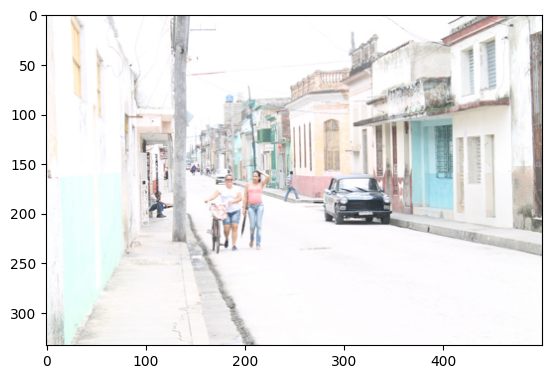

In [8]:

list_files = os.listdir('.')
list_files = ['bild01.jpg', 'bild02.jpg', 'bild03.jpg', 'bild04.jpg', 'bild05.jpg', 'monkey.jpg', 'sea_wall.jpg', 'wood.jpg']
image_list = []
for file in list_files:
    image = ski.io.imread(file)
    image_list.append(image)
plt.imshow(image_list[2])
plt.show()

 Schreiben Sie einen Funktion, die das Histogramm eines 8-Bit-Graustufenbildes (256
 Intensitatsstufen) berechnet.

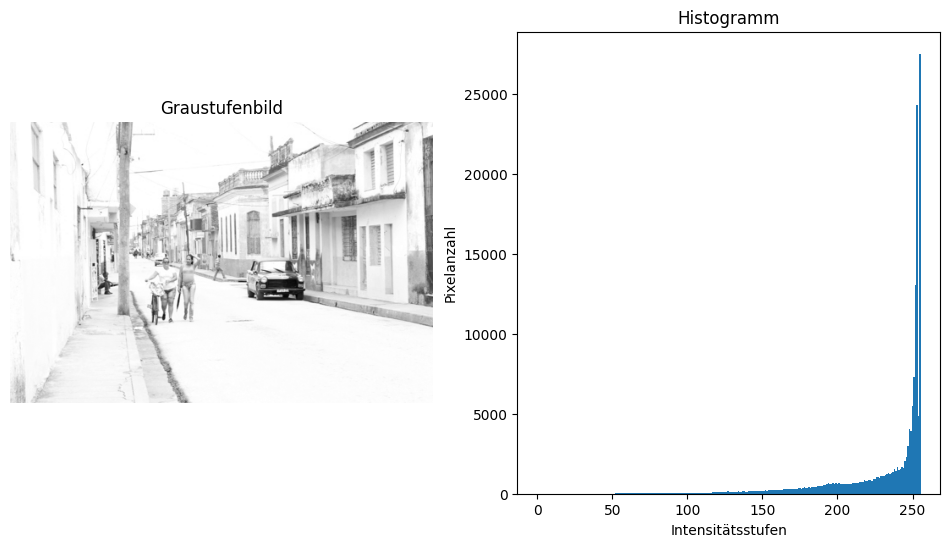

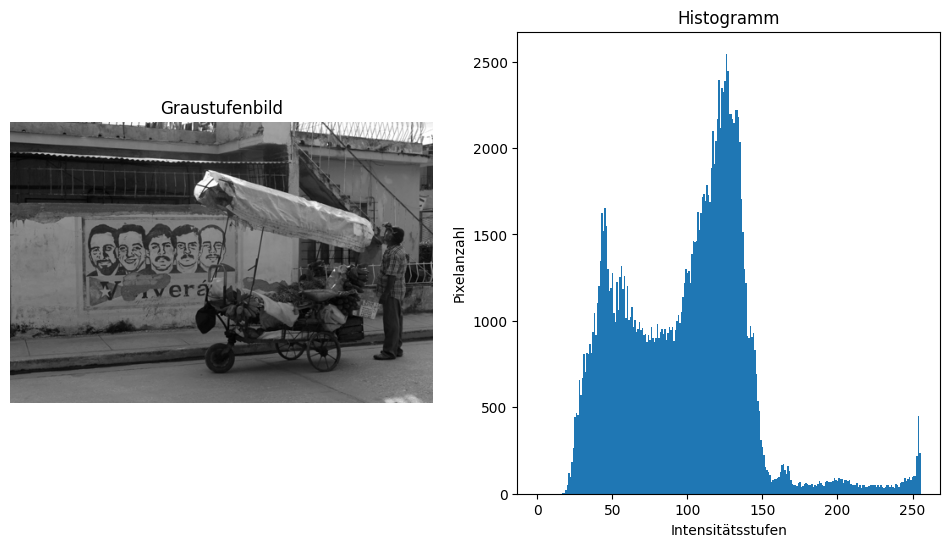

In [28]:
def rgb_to_gray(rgb_img):
   # Berechnung der Graustufenwerte (Luminosity-Methode)
    grayscale_image = 0.299 * rgb_img[:, :, 2] + 0.587 * rgb_img[:, :, 1] + 0.114 * rgb_img[:, :, 0]
    
    # Umwandlung in Ganzzahlen (0-255)
    grayscale_image = grayscale_image.astype(np.uint8)
    
    return grayscale_image

def histogramm_gray(gray_image):
    hist = np.zeros(256, dtype=int)
    
    # Schleife über alle Pixel
    for i in range(gray_image.shape[0]):
        for j in range(gray_image.shape[1]):
            intensity = gray_image[i, j]
            hist[intensity] += 1
            
    return hist

def plot_hist(gray_image, hist):
    """
    Zeigt das Graustufenbild und sein Histogramm in einem Plot.
    """
    plt.figure(figsize=(12, 6))
    
    # Zeige das Graustufenbild
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Graustufenbild")
    plt.axis("off")
    
    # Zeige das Histogramm
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(256), hist, width=1)
    plt.title("Histogramm")
    plt.xlabel("Intensitätsstufen")
    plt.ylabel("Pixelanzahl")
    
    plt.show()

img_rgb1 = image_list[2]
img_gray1 = rgb_to_gray(img_rgb1)

hist1 = histogramm_gray(img_gray1)

img_rgb = image_list[3]
img_gray = rgb_to_gray(img_rgb)

hist = histogramm_gray(img_gray)

# Plotten des Graustufenbildes und Histogramms
plot_hist(img_gray1, hist1)
plot_hist(img_gray, hist)


4.
a.  Welche Aufnahmefehler sind in 01 und 03 zu erkennen? Woran ist dies im Histogramm erkennbar?
    Bild 1 hat einen deutlichen Belichutngsfehler, viele Werte in den Extremen Hell und Dunkel.
    Bild 3 hat eine extreme Überbelichtung die durch fast nur Werte im Weißbereich im Histogramm erkennbar wird. 

b. Bild01 ist das aufgenommene Bild. Bild02 wurde nachbearbeitet. Die Helligkeit wurde erhoeht. Woran ist dies im Histogramm   erkennbar? Welche Daten gehen dabei verloren?
    Die Dunkelwerte wurden gespreitzt, das extremum im Weißbereich ist aber noch vorhanden. es gehen Feinheiten, vor allem in den Randbreichen Schwarz und Weiß, wie Konturen (z.b. die Wolken) verlohren.

c. Bild04 ist das aufgenommene Bild. Bild05 wurde einem Bearbeitungsschritt unterzogen. Was wurde in Bild05 veandert? Woran kann man dies in seinem Histogramm erkennen?
    Es wurde eine Kontrastanpassung gemacht. Das erkennt man daran das in Bild 5 alle Intensitätsstufen genutzt werden und in Bild 4 nicht (erkennbar). Dadurch werden die die Kontraste verstärkt und das Histogramm gespreitzt. 

 5. Implementieren Sie eine Funktion, die eine Punktoperation mithilfe einer Lookup-Tabelle
 zum Aufhellen eines Bildes durchfuhrt

 a. In Aufgabe (4b) gingen Daten beim Aufhellen eines Bildes verloren. Wie konnte
 dies vermieden werden?

    Beim Aufhellen eines Bildes können Pixelwerte, die übder den maximal darstellbaren Wert (255) hinausgehen, abgeschnitten werden (Clipping) Dies kann durch Histogrammausgleich verhindert werden

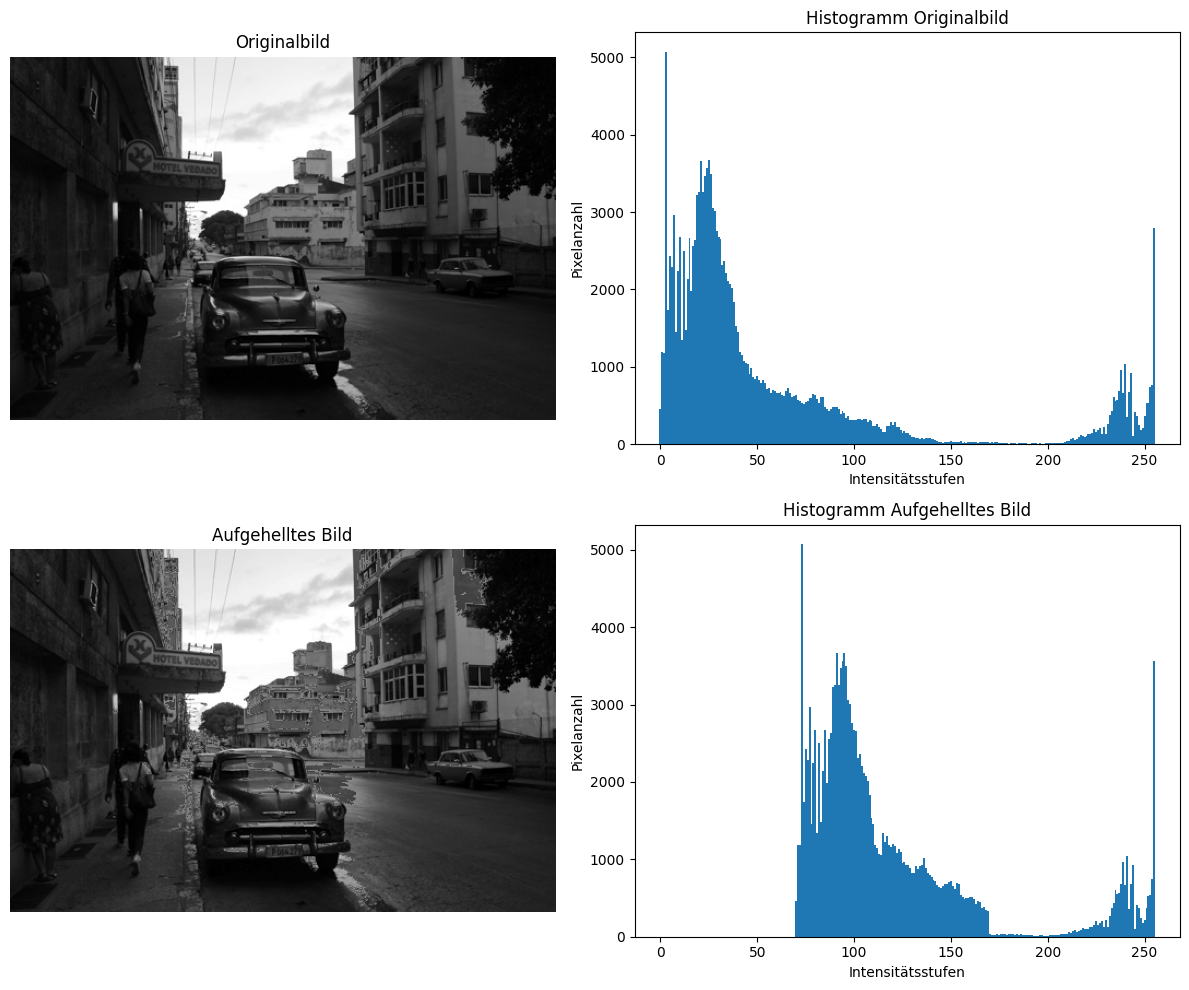

array([[98, 95, 92, ..., 73, 73, 73],
       [98, 92, 91, ..., 73, 71, 73],
       [98, 93, 90, ..., 73, 73, 73],
       ...,
       [77, 77, 79, ..., 96, 94, 94],
       [85, 85, 85, ..., 96, 95, 98],
       [91, 91, 91, ..., 96, 96, 96]], shape=(333, 500), dtype=uint8)

In [ ]:
def contrast_change(img, threshold1=100, threshold2=200, dark_factor=50, mid_factor=20, bright_factor=1):
    
    lut = np.zeros(256, dtype=np.uint8)
    
    # Für dunkle Bereiche
    for i in range(0, threshold1):
        lut[i] = np.clip(int(i + dark_factor), 0, 255)
    
    # Für mittlere Bereiche
    for i in range(threshold1, threshold2):
        lut[i] = np.clip(int(i + mid_factor), 0, 255)
    
    # Für helle Bereiche
    for i in range(threshold2, 256):
        lut[i] = np.clip(int(i + bright_factor), 0, 255)
    
    # Anwenden der LUT auf das Bild
    new_img = lut[img]
    
    # Berechne die Histogramme der Bilder
    hist_original = histogramm_gray(img)
    hist_new = histogramm_gray(new_img)
    
    # Visualisierung
    plt.figure(figsize=(12, 10))
    
    # Zeige das Originalbild
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Originalbild")
    plt.axis("off")
    
    # Zeige das Histogramm des Originalbildes
    plt.subplot(2, 2, 2)
    plt.bar(np.arange(256), hist_original, width=1)
    plt.title("Histogramm Originalbild")
    plt.xlabel("Intensitätsstufen")
    plt.ylabel("Pixelanzahl")
    
    # Zeige das aufgehellte Bild
    plt.subplot(2, 2, 3)
    plt.imshow(new_img, cmap='gray')
    plt.title("Aufgehelltes Bild")
    plt.axis("off")
    
    # Zeige das Histogramm des aufgehellten Bildes
    plt.subplot(2, 2, 4)
    plt.bar(np.arange(256), hist_new, width=1)
    plt.title("Histogramm Aufgehelltes Bild")
    plt.xlabel("Intensitätsstufen")
    plt.ylabel("Pixelanzahl")
    
    plt.tight_layout()
    plt.show()
    
    return new_img


contrast_change(img_gray1, threshold1=100, threshold2=200, dark_factor=70, mid_factor=15, bright_factor=0)
